###BA775 - Team Project - Team 8
Hanyu Chen, Aditya Sinha, Chunxiaqiu Yang, Jonathan Sherman, Alexander von Schwerdtner


#**Netflix Analysis to Maximize United States Users**

Our mission is to help Netflix summarize the details of their movie and TV show library to help them see trends on how their library has changed. Included in this report are summarized Netflix materials based on popular genres and actors to compare with highest earning  and popular entertainment types so Netflix can maximize their user amount. 

Netflix has shared with our team that about 1/3rd of their subscribers are in the United states (https://www.comparitech.com/tv-streaming/netflix-subscribers/). They want to ensure their library is meeting the popularity demands of U.S. consumers and find ways to further increase their subscriber use in the United states.    

**Source:**

* https://www.kaggle.com/shivamb/netflix-shows (As of July 2021)
* https://www.kaggle.com/PromptCloudHQ/imdb-data/data (June, 2017)  

**Original Source:**
* https://flixable.com/
* IMDB Website


###**Dataset Overview:**
Dataset was collected from Kaggle which contains Netflix TV-show and movies information. Original data source used is Flixable which is a third-party Netflix search engine. We also used IMDB rating dataset collected from Kaggle to get the ratings of the netflix movies.

Netflix TV-show Dataset contains 12 columns where all columns are string except year added which is an integer.

IBDM dataset has 10 columns all of them are string except the rating which was float.

####**Part 1 -** Overview of Netflix Library
#####*This Section will provide  summary to Netflix of their  Library in order to understand the makeup*


**1. What is the total size of the Netflix library and how many are Tv Shows or Movies?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT 
    COUNT(CASE WHEN type = 'Movie'
    THEN show_id END) AS movie_totals,
    COUNT(CASE WHEN type = 'TV Show' 
    THEN show_id END) AS tv_show_totals,
    COUNT(type) as total_library
 FROM `ba775-team8-b2.Netflix.netflix_titles` 

,movie_totals,tv_show_totals,total_library
0,5377,2410,7787


Of the almost 8000s unique videos on next more than 60% are movies. This shows netflix has favored movies over TV shows or they need more categories to breakdown what content types they have. 

**2. How many different rating types exist in the Netflix library and how many titles are there in each type?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT rating as Type_Of_Rating, COUNT(*) as Total_Content 
FROM `ba775-team8-b2.Netflix.netflix_titles` 
WHERE rating IS NOT NULL
GROUP BY rating
ORDER BY Total_Content DESC
Limit 5
#Rating for both TV and movies

,Type_Of_Rating,Total_Content
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386


Netlfix should compare their viewer count for shows in each rating type to compare if their viewers tend to perfer where their library is currently focused on ratings geared toward teenagres and adults. 

**3. Which release years for movies have the most movies in Netflix?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT release_year, COUNT(release_year) AS movie_added FROM `ba775-team8-b2.Netflix.netflix_titles`
GROUP BY release_year
ORDER BY release_year DESC
Limit 5

,release_year,movie_added
0,2021,31
1,2020,868
2,2019,996
3,2018,1121
4,2017,1012


Focusing on the vast amount of content in recent years is good for young viewers, but could begin to focus on earlier years to attract a different subscriber type. 

**4. Which Countries produce the most content that ends up on Netflix?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT 
    country,
    COUNT(CASE WHEN type = 'Movie'
    THEN show_id END) AS movie_totals,
    COUNT(CASE WHEN type = 'TV Show' 
    THEN show_id END) AS tv_show_totals,
    COUNT(type) as total_content_prodcution
 FROM `ba775-team8-b2.Netflix.netflix_titles` 
 WHERE country IS NOT NULL
 GROUP BY country
 ORDER BY total_content_prodcution DESC
 LIMIT 5;

,country,movie_totals,tv_show_totals,total_content_prodcution
0,United States,1850,705,2555
1,India,852,71,923
2,United Kingdom,193,204,397
3,Japan,69,157,226
4,South Korea,36,147,183


The overhwhelming majority coming from the United States followed by India and the United Kingdom. The none catgeory should be organized to under where these 500 movies and TV shows are being made to accuratley understand what countries are msot utilized. 

####**Part 2 -** Netflix Movies
#####*This section will futher investigate the Movie library make up of Netflix. Combinig the data with the IMDB sites information on ratings and other popularity metrics will help Netflix know which movies to focus ono keeping and promoting on their main page*

**5. What is the average duration for movies on Netflix?**



In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT type,AVG(Updated_duration) AS avg_durationMovie FROM 
(SELECT type, CAST(REPLACE(duration,'min','') AS INT64) AS Updated_duration
FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type='Movie')
GROUP BY type

,type,avg_durationMovie
0,Movie,99.307978


**6. Based on the popular IMDB rating system, what are the highest rated movies on Netflix?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT n.title, n.director, n.country, n.date_added, r.Rating
FROM `ba775-team8-b2.Netflix.netflix_titles` as n
INNER JOIN `ba775-team8-b2.Netflix.IMBd_movies_ratings` as r
   ON lower(n.title) = lower(r.title)
ORDER BY r.Rating DESC
LIMIT 5

,title,director,country,date_added,Rating
0,Dangal,Nitesh Tiwari,India,"June 21, 2017",8.8
1,Inception,Christopher Nolan,"United States, United Kingdom","January 1, 2020",8.8
2,The Intouchables,"Olivier Nakache, Éric Toledano",France,"January 11, 2021",8.6
3,The Lives of Others,Florian Henckel von Donnersmarck,Germany,"March 15, 2019",8.5
4,Taare Zameen Par,Aamir Khan,India,"January 10, 2021",8.5


Netflix should ensure these movies stay on their site for as much time as possilbe and regulary, promote and ensure users are aware that these movies exist in their library. 

**7. From the IMDB data set, what are the top grossing box office movies that Netflix has in their library? ?**



In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT n.title, n.director, n.country, n.date_added, r.Rating, r.Revenue__Millions_
FROM `ba775-team8-b2.Netflix.netflix_titles` as n
INNER JOIN `ba775-team8-b2.Netflix.IMBd_movies_ratings` as r
   ON lower(n.title) = lower(r.title)
ORDER BY r.Revenue__Millions_ DESC
LIMIT 5

,title,director,country,date_added,Rating,Revenue__Millions_
0,The Jungle Book,None,"India, Germany, France","May 11, 2019",7.5,364.00
1,Spider-Man 3,Sam Raimi,United States,"November 1, 2019",6.2,336.53
2,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,United States,"January 1, 2019",6.2,317.01
3,Inception,Christopher Nolan,"United States, United Kingdom","January 1, 2020",8.8,292.57
4,Star Trek,None,United States,"October 1, 2017",8.0,257.70


Movies that were extremely successfull like The Jungle Book and Spiderman 3 should be prioritized on the main page and to keep in the library. Additionally, netflix can study the types of moves that were successfull in order to narrow focus on what types of content to continue to add.

**8. What is a summary of the movies in duration ranges and how many fall in each range?**

In [ ]:
## Distribution of duration for Movies -Hanyu
%%bigquery --project=ba775-team8-b2
SELECT duration_range, COUNT(*) AS num_movies FROM 
(
SELECT CASE 
WHEN CAST(REPLACE(duration,'min','') AS INT64) <= 40 THEN '0 - 40'
WHEN CAST(REPLACE(duration,'min','') AS INT64) BETWEEN 41 AND 80 THEN '41 - 80'
WHEN CAST(REPLACE(duration,'min','') AS INT64) BETWEEN 81 AND 120 THEN '81 - 120'
WHEN CAST(REPLACE(duration,'min','') AS INT64) BETWEEN 121 AND 160 THEN '121 - 160'
WHEN CAST(REPLACE(duration,'min','') AS INT64) BETWEEN 161 AND 200 THEN '161 - 200'
ELSE '201 +' END AS duration_range
FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type='Movie'
)
GROUP BY duration_range
ORDER BY CAST(SPLIT(duration_range,' ')[OFFSET(0)] as INT64)

,duration_range,num_movies
0,0 - 40,159
1,41 - 80,835
2,81 - 120,3372
3,121 - 160,874
4,161 - 200,122
5,201 +,15


Netflix can see that 1.5-2 hour movie duration contains  the vast majority of their movies library. 

####**Part 3 -** Netflix TV-Shows
#####*This section will futher investigate the TV-Show libaray*

**9. What is the  median number of seasons  for a TV-show on Netflix?**


In [ ]:
%%bigquery --project=ba775-team8-b2
WITH updated_season as (SELECT type, CAST(REPLACE(REPLACE(duration,'s',''),'Seaon','') AS INT64) AS updated_duration
FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type='TV Show')

SELECT
  DISTINCT type,
  PERCENTILE_DISC(
      updated_duration,
      0.5) OVER (PARTITION BY type) AS Median_TV_SHOW
FROM updated_season
WHERE type='TV Show'

,type,Median_TV_SHOW
0,TV Show,1


**10. What is the longest running TV-show? on Netflix and how many seasons did it last?**


In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT show_id, title, type,duration FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type = 'TV Show'
      AND duration LIKE '16 S%'

,show_id,title,type,duration
0,s2539,Grey's Anatomy,TV Show,16 Seasons


Grey's Aanatotmy spanning 16 season is the longest running show on Netflix which should help them expect any show created or added is not likely to exceed this. 

**11. What are the different ratings types for just TV shows and which rating has the most amount on Netflix?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT rating, COUNT(rating) AS count_rating FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type='Movie' AND rating IS NOT NULL
GROUP BY rating
ORDER BY 2 DESC 
LIMIT 5

,rating,count_rating
0,TV-MA,1845
1,TV-14,1272
2,R,663
3,TV-PG,505
4,PG-13,386


Just like with Movies, the mature and tv-14 content holds the majority of the TV show library. Netflix should pair this with the distribution of views by rating to ensure that this divide in catelog matches their viewers. 

**12. What is the disperation of length of TV shows by season on Netflix?**


In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT duration_season, COUNT(*) AS num_TV FROM 
(
SELECT CASE 
WHEN CAST(REPLACE(REPLACE(duration,'s',''),'Seaon','') AS INT64) <= 1 THEN '0 - 1'
WHEN CAST(REPLACE(REPLACE(duration,'s',''),'Seaon','') AS INT64) BETWEEN 2 AND 4 THEN '2 - 4'
WHEN CAST(REPLACE(REPLACE(duration,'s',''),'Seaon','') AS INT64) BETWEEN 5 AND 7 THEN '5 - 7'
WHEN CAST(REPLACE(REPLACE(duration,'s',''),'Seaon','') AS INT64) BETWEEN 8 AND 10 THEN '8 - 10'
ELSE '10 +' END AS duration_season
FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type='TV Show'
)
GROUP BY 1
ORDER BY CAST(SPLIT(duration_season,' ')[OFFSET(0)] as INT64)

,duration_season,num_TV
0,0 - 1,1608
1,2 - 4,653
2,5 - 7,107
3,8 - 10,32
4,10 +,10


####**Part 4 -** Trend over time
#####*This section will detail how Netflix library has trended in changing over time*

**13. How many new movies and TV shows has netflix added to theur libaray by year?**



In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT  RIGHT(date_added, 4) AS year_added,
    COUNT(release_year) as num_content_added
 FROM `ba775-team8-b2.Netflix.netflix_titles`
GROUP BY year_added
HAVING year_added <> 'none'
ORDER BY year_added DESC
LIMIT 5

,year_added,num_content_added
0,2021,117
1,2020,2009
2,2019,2153
3,2018,1685
4,2017,1225


Covid may have effected the amount of content that netflix could add last year, they must ensure they keep increase theri library to attract new customers and keep exisiting ones excited by new additions

**14. What is the  amount of content from each release year grouped by rating type on Netflix?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT release_year, rating as Type_Of_Rating, COUNT(*) as Total_Content FROM `ba775-team8-b2.Netflix.netflix_titles` 
GROUP BY rating, release_year
ORDER BY release_year DESC
Limit 5

,release_year,Type_Of_Rating,Total_Content
0,2021,TV-14,7
1,2021,R,1
2,2021,TV-G,2
3,2021,TV-MA,14
4,2021,TV-Y,2


This could help Netflix find gaps in their library to add G or PG rated shows from early years that may be wanted by older users to show their younger families.

**15. Digging further from question 14, for each release  year, what is the highest count of rating type on Netflix?**

In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT tb1.release_year, tb1.Max_Content_Count, tb2.Type_Of_Rating 
FROM
(
    SELECT release_year, MAX(Total_Content) as Max_Content_Count 
    FROM (SELECT release_year, rating as Type_Of_Rating, COUNT(*) as Total_Content FROM `ba775-team8-b2.Netflix.netflix_titles` GROUP BY rating, release_year)
    GROUP BY release_year
) as tb1
INNER JOIN (SELECT release_year, rating as Type_Of_Rating, COUNT(*) as Total_Content FROM `ba775-team8-b2.Netflix.netflix_titles` GROUP BY rating, release_year) as tb2
ON tb1.release_year = tb2.release_year
WHERE tb1.Max_Content_Count = tb2.Total_Content and 
ORDER BY tb1.release_year DESC
Limit 5

,release_year,Max_Content_Count,Type_Of_Rating
0,2021,14,TV-MA
1,2020,427,TV-MA
2,2019,499,TV-MA
3,2018,544,TV-MA
4,2017,453,TV-MA


**16. What is the breakdown of content added to the Netflix library by month?**



In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT month_added, COUNT(*) AS num_content_added FROM 
(
SELECT CASE 
WHEN date_added LIKE 'January%' THEN 'JAN'
WHEN date_added LIKE 'February%' THEN 'FEB'
WHEN date_added LIKE 'March%' THEN 'MAR'
WHEN date_added LIKE 'April%' THEN 'APR'
WHEN date_added LIKE 'May%' THEN 'MAY'
WHEN date_added LIKE 'June%' THEN 'JUN'
WHEN date_added LIKE 'July%' THEN 'JUL'
WHEN date_added LIKE 'August%' THEN 'AUG'
WHEN date_added LIKE 'September%' THEN 'SEP'
WHEN date_added LIKE 'October%' THEN 'OCT'
WHEN date_added LIKE 'November%' THEN 'NOV'
WHEN date_added LIKE 'December%' THEN 'DEC'
END AS month_added
FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE date_added IS NOT NULL 
)
GROUP BY month_added
HAVING month_added IS NOT NULL 
ORDER BY num_content_added DESC
LIMIT 5

,month_added,num_content_added
0,DEC,817
1,OCT,780
2,JAN,746
3,NOV,730
4,MAR,661


This trend of of the winter and fall months having the most amount of content added to Netflix should be compared with usage frequencies and new subrcribtions added to help Netflix maximize windows of attracting new users and keeping the base they have.

####**Part 5 -** Maximizing User Amount / Research Analysis Conclusion
#####*As mentioned in the project Overview,  United States users make up roughly 1/3rd of the total users in the Netflix library as of July 2021. As shown above how they majority of their library makes up content from the U.S.*
*https://www.comparitech.com/tv-streaming/netflix-subscribers/*

**17. Recent research has shown that PG-13 movies are the most profitable rating type in theatres due to their broad audiecne reach(1995-2021). What percent of movies produced in the U.S. on Netflix are rated PG-13?**

*https://www.statista.com/statistics/433709/highest-grossing-movies-domestic-box-office-rating/*

In [ ]:
%%bigquery --project=ba775-team8-b2
Select ((SELECT COUNT(*) FROM `ba775-team8-b2.Netflix.netflix_titles` WHERE country = 'United States' and  type = 'Movie' AND rating = 'PG-13')*100/COUNT(*)) as US_PG13_movies_percentage
FROM `ba775-team8-b2.Netflix.netflix_titles` 
WHERE country = 'United States' and  type = 'Movie'

,US_PG13_movies_percentage
0,12.27027


Netflix may consider increasing the amount of moveis that are PG-13 from U.S. productions to further reach the broad audience it captures in theatres. 

**18. This study has found over the last 25 (1995-2021) years the ranking of highest grossing movie genres in North America. For the top 5 grossing genres of U.S. produced movies, Where do they rank in number of movies on netflix?**

*https://www.statista.com/statistics/188658/movie-genres-in-north-america-by-box-office-revenue-since-1995/*




In [ ]:
%%bigquery --project=ba775-team8-b2
SELECT Top_grossing_movie_genres, COUNT(*) AS movie_genre_breakdown,  
FROM 
(
SELECT 
CASE 
  WHEN listed_in LIKE '%Adventure%' OR  listed_in LIKE '%Action%' THEN 'Rank 1: Adventure/Action'
  WHEN listed_in LIKE '%Drama%' THEN 'Rank 2: Drama'
  WHEN listed_in LIKE '%Comedy%' or listed_in LIKE '%Comedies%'  THEN 'Rank 3: Comedy'
  WHEN listed_in LIKE '%Horror%' THEN 'Rank 4: Horror'
  WHEN listed_in LIKE '%Thriller%' THEN 'Rank 5: Thriller'
  WHEN listed_in LIKE '%Sci-Fi%' THEN 'Rank 6: Sci-fi'
  WHEN listed_in LIKE '%Document%' THEN 'Rank 7: Documentaries'
  WHEN listed_in LIKE '%Musical%' THEN 'Rank 8: Musical'
  ELSE 'Other Genres' END AS Top_grossing_movie_genres
FROM `ba775-team8-b2.Netflix.netflix_titles`
WHERE type = 'Movie'
AND country IN ('United States', 'Canada', 'Mexico')
AND listed_in IS NOT NULL
)
GROUP BY Top_grossing_movie_genres
ORDER BY movie_genre_breakdown DESC  

,Top_grossing_movie_genres,movie_genre_breakdown
0,Rank 3: Comedy,580
1,Rank 2: Drama,528
2,Rank 7: Documentaries,406
3,Rank 1: Adventure/Action,210
4,Other Genres,127
5,Rank 4: Horror,111
6,Rank 5: Thriller,52
7,Rank 8: Musical,11
8,Rank 6: Sci-fi,8


Action (47 billion) and Adventure(64 billion) rank highest in the charts at roughly 111 billion dollars in revenue, and Drama is section in 35 billion. Netflix should promote these on their site more and  add more content in these genres in order to increase users that are flocking to the theatres to see these movies over the last two decades.

####**Part 6 -** Report Suummary

This analysis for Netflix of its library as of July 2021 has provided key insights to help Netflix understand its library composition. The library is predominantly movies consisting of over 60% of the entire library. Content produced in the United States provides most of the content for Netflix, followed by India. The TV Shows on Netflix only average 1 season per show. The United States is the top Show producer, followed by the United Kingdom, and the TV-MA rating accounts for 34.7% of all TV shows, which is the largest share of all rating types.  Movies on Netflix are on average 1.5 to 2 hours in duration. Inception, Dangal, and The Intouchables are the three highest-rated movies on the popular IMDB movie site that exist on the Netflix library. Continuing to combine IMDB with the vast Netflix library will help the company identify which movies to keep and promote on the site's main page. 
 
Netflix has been significantly increasing its library over the last five years. Studying the ratings of the content added, there has been a sharp increase in TV-MA content added to the Netflix library. As summarized above, most of the library is made up of movies produced in the United States, and their most extensive User base is in the United States. Based on our findings, Netflix should focus on U.S. users to maximize the usage of their platform. Comparing the U.S. Box Office revenue trends to the library makeup provided above should help Netflix target types of content to add to their site. Our team recommends Netflix focus on the adventure/action genre as it earns the most significant revenue of any movie genre. Netflix should also concentrate on PG-13 movies as movies with these ratings are the top earners at the box office. 


####**Part 7.1 -** Embedded Dashboard
*https://datastudio.google.com/reporting/25ed1a42-630e-4ddb-8907-e7b4f4738552/page/p_ur89i2szmc*

In [ ]:
from IPython.display import IFrame
IFrame(src='https://datastudio.google.com/embed/reporting/25ed1a42-630e-4ddb-8907-e7b4f4738552/page/p_ur89i2szmc"', width="1000", height="800")

####**Part 7.2 -** Dashboard Screenshots

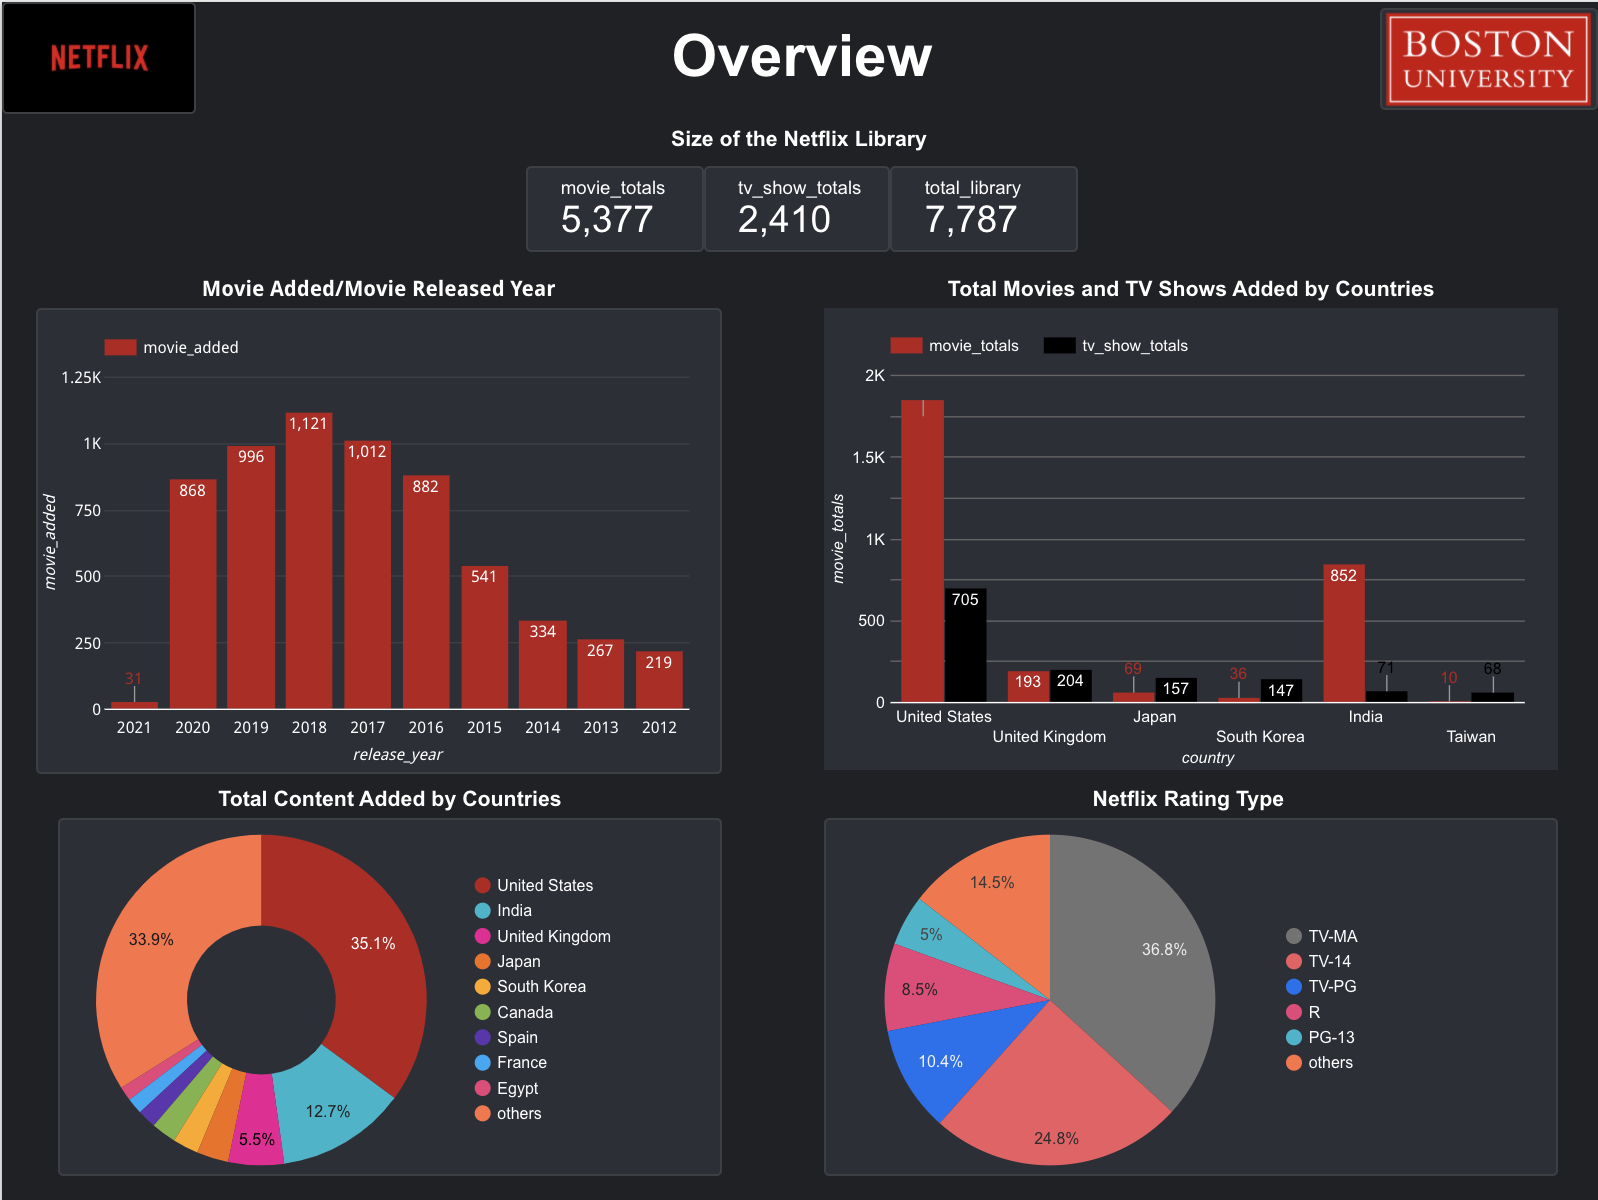

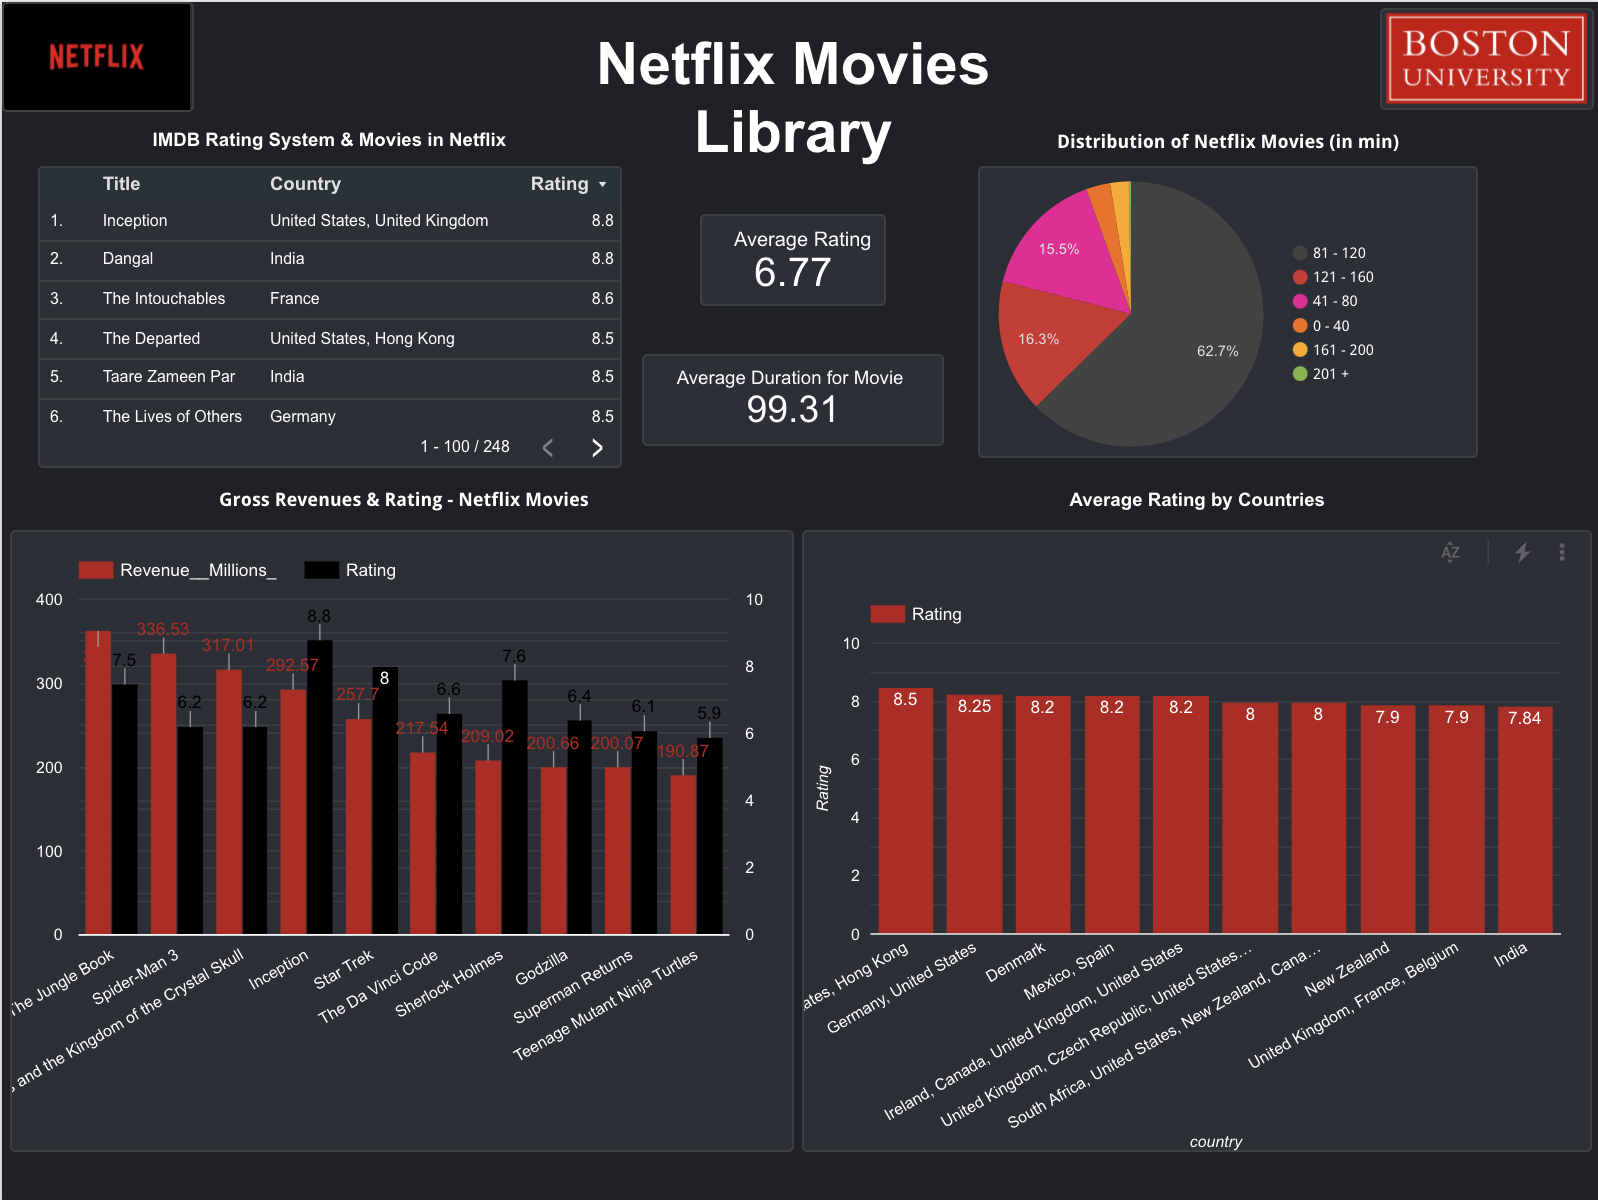

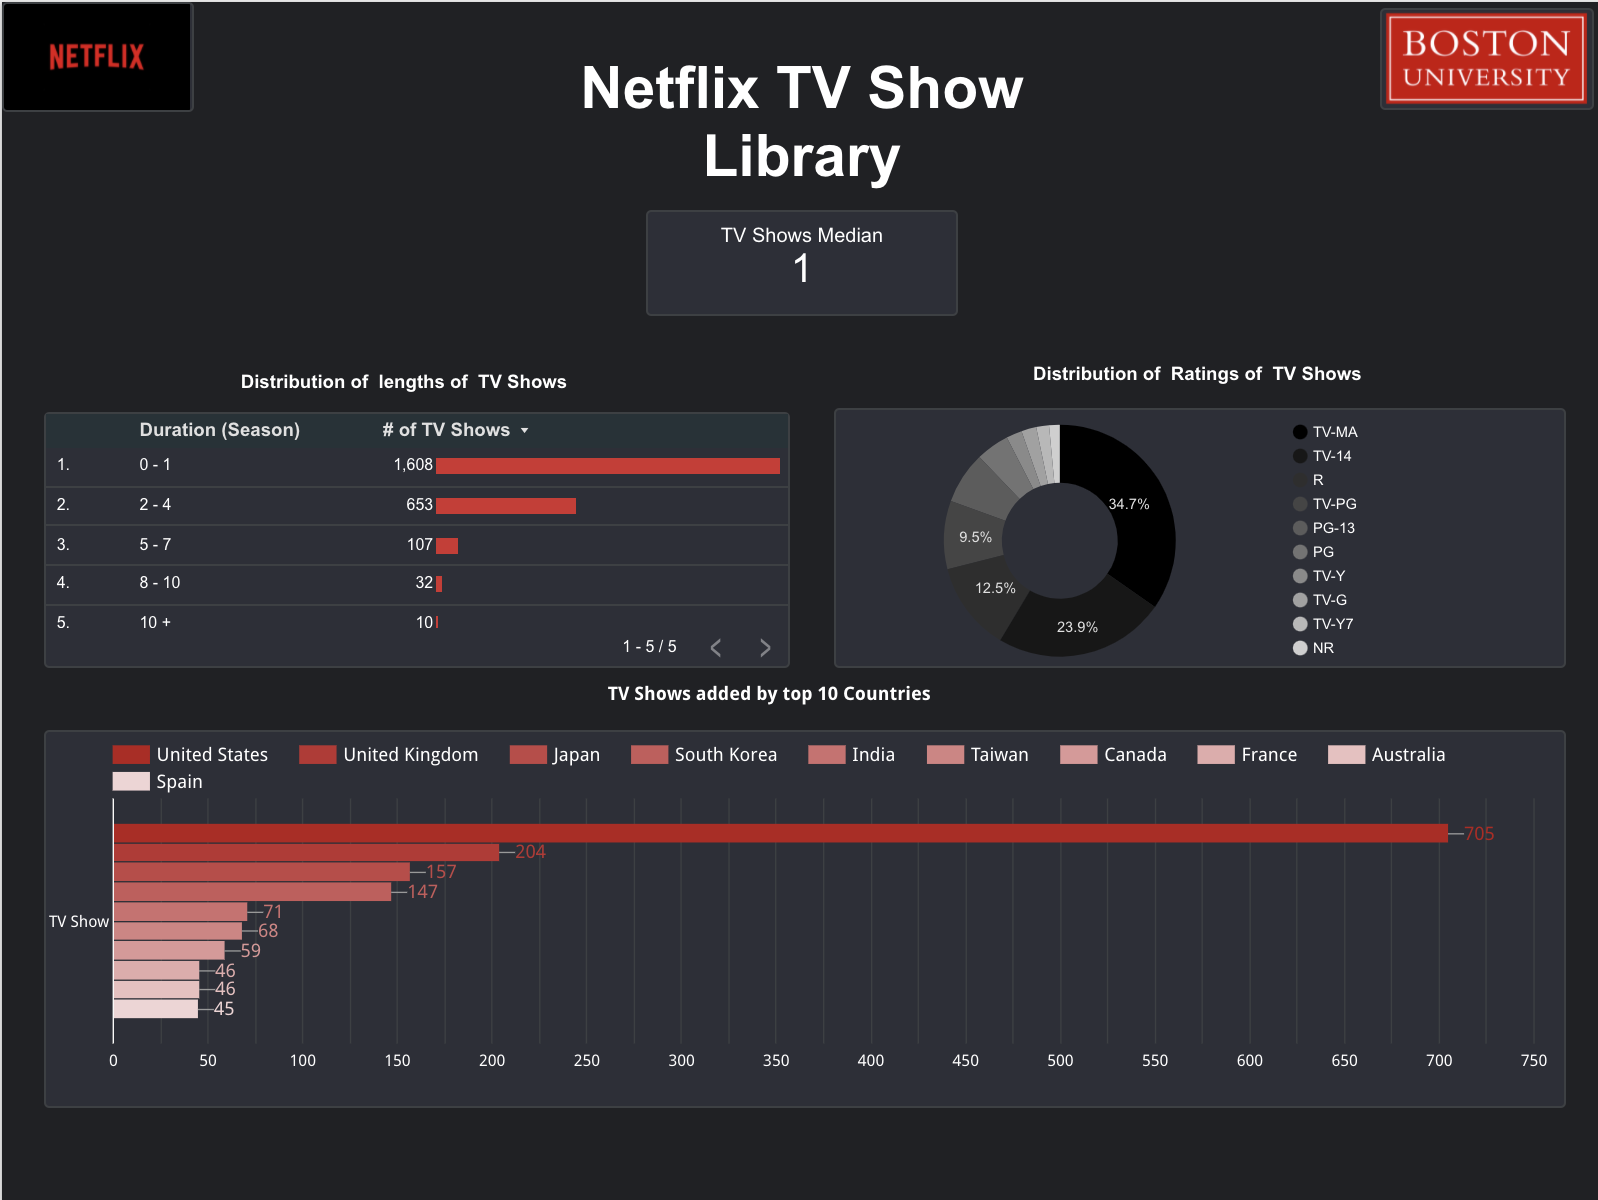

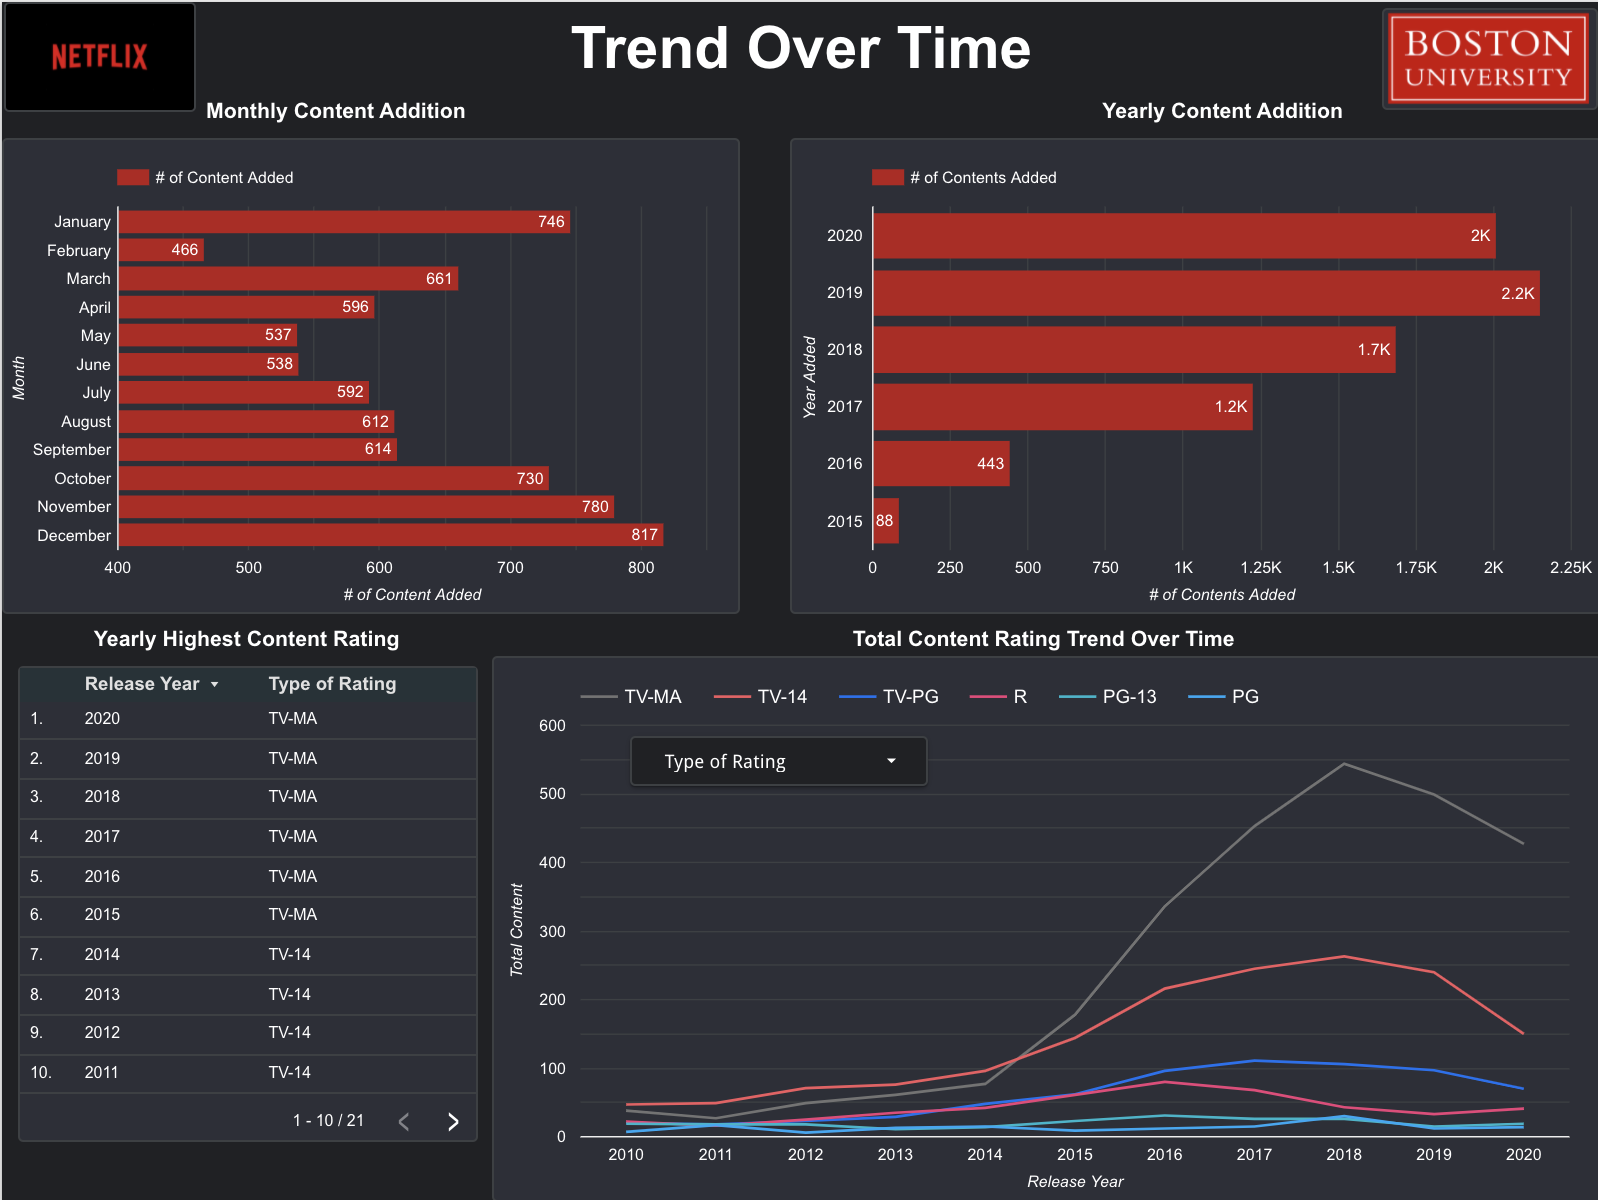

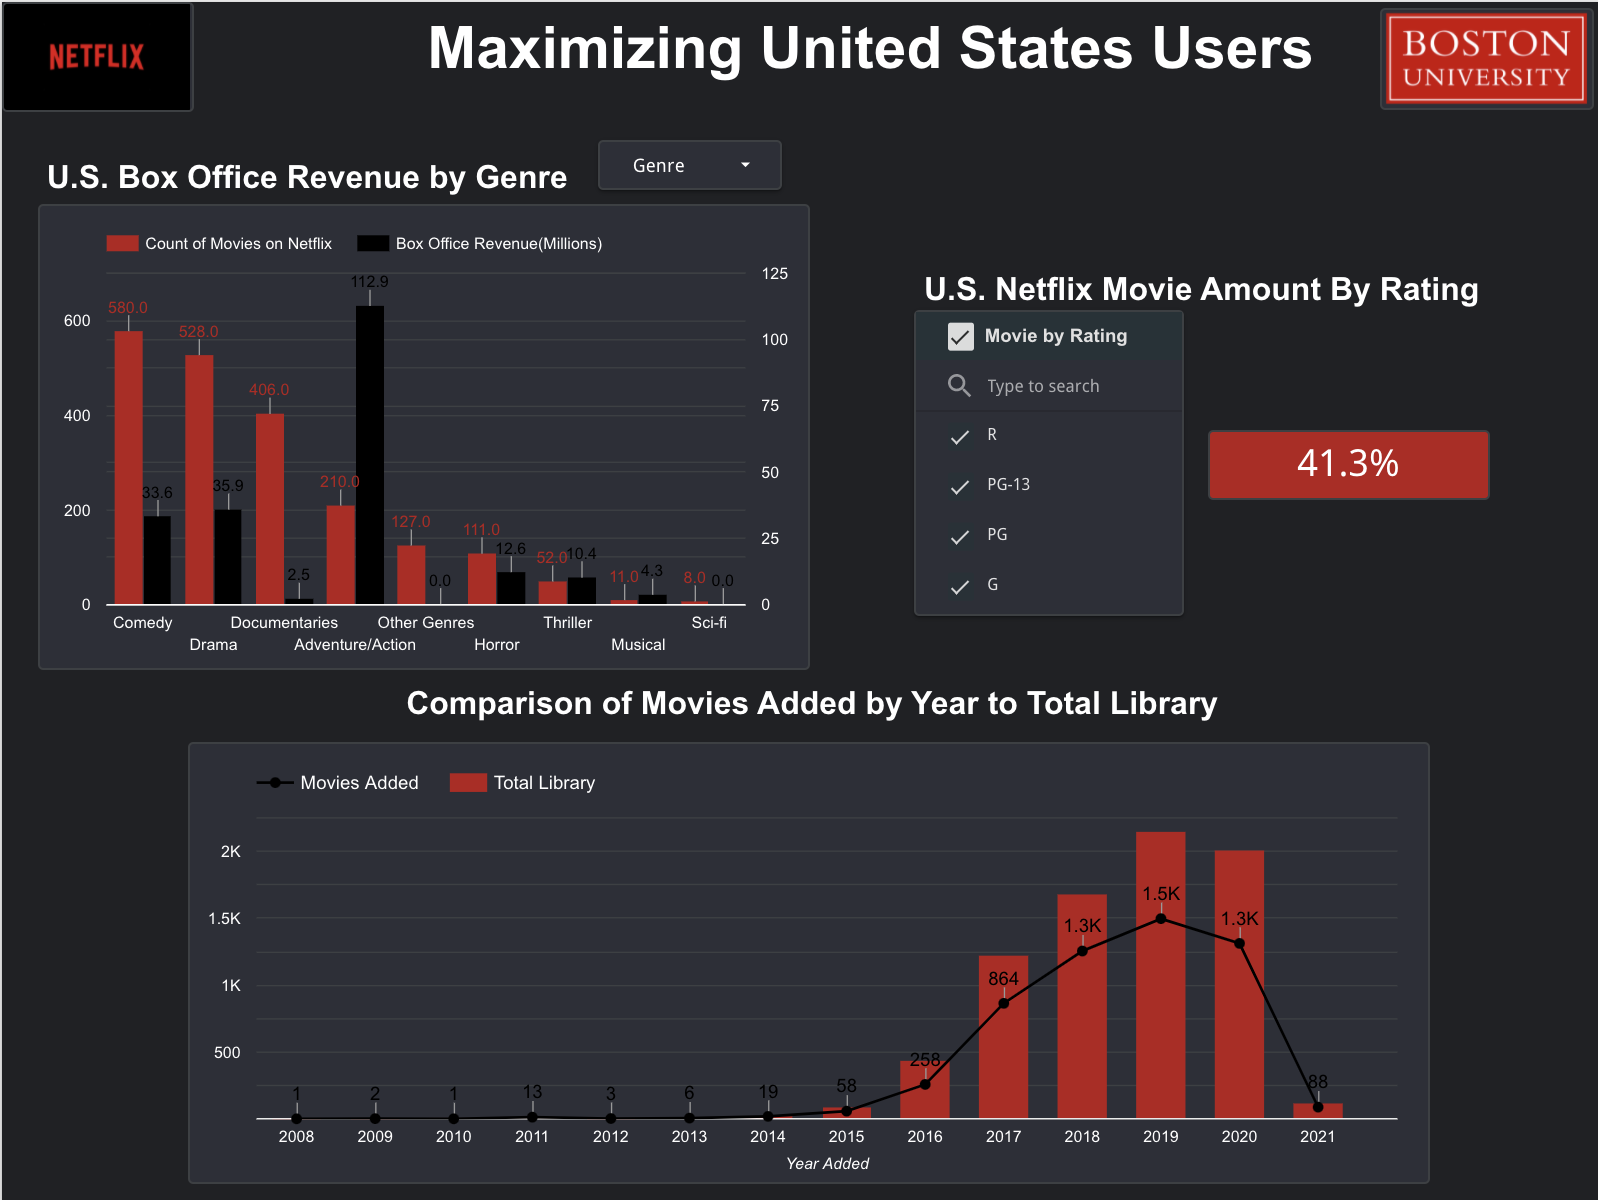